# Black-hole binary formation channels with gaussian mixtures.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import norm

In [2]:
# pip install -U threadpoolctl  (used to debug some error I had when I computed the GM with $\mathrm{ncomponents} = 1$)

#### Tasks

1) Load this file (`np.load`) and complete a quick exploration of the data. How many modes do you think you see?

2) Take some time to explore `sklearn.mixture.GaussianMixture`. Check the documentation, some examples, the help menu, etc. You first need to define the model (instance of a class), and then train it on the data using the `fit` method (the data provided are already in the right numpy format!). This will output the trained model, which has various attributes.

*Note*. We'll do a more formal introduction to scikit-learn in one of the next lectures. This is meant to be a formative example on how you might find yourself dealing with a library you've never seen before. This happens *all the time* in scientific research!

3) Complete the fit 10 times with $N=1,...,10$ Gaussians. 

Note: `sklearn` by default will use the so-called [Expectation-Maximization algorithm](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm), which is one of the many great things in data science we don't have time to study in detail.

4) For each of this fits, compute the AIC (easy! It's a attribute of the trained model!). Plot $N$ vs AIC: which model is preferred?

5) Plot the preferred solution on top of the input data. You should get a very nice fit!

6) Understand (i.e. plot) which Gaussian mode corresponds to which part of the input dataset. 

*Hint:* Useful methods here are `score_samples` and `predict_proba`: you'll need them both. Try to understand what they do and how you can put them together.

In [3]:
data = np.load("/Users/nicolegrillo/ilovegit/astrostatistics_bicocca_2023/solutions/formationchannels.npy")

Quick data view:

Text(0, 0.5, 'data values')

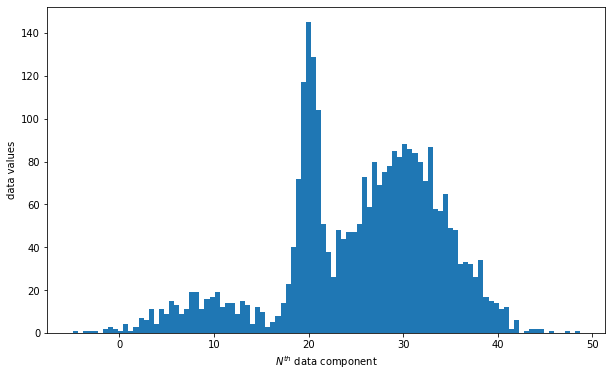

In [4]:
plt.figure(figsize=(10, 6))
plt.hist(data, bins=100)
plt.xlabel("$N^{th}$ data component")
plt.ylabel("data values")

My first guess is I see three distributions. Let's check it: 

## 1) 3 Gaussians fit: 

In [5]:
gm = GaussianMixture(n_components=3, random_state=0).fit(data)  # seed = 0 meakes the code reproducible

Now that I have the fit I want to have an idea of how the fit interpolates data: 

In [6]:
x_i = np.array(np.arange(np.min(data), np.max(data), 0.01))  # create vector of x-axis points

wts, mus, sigmas = gm.weights_.flatten(), gm.means_.flatten(), np.sqrt(gm.covariances_.flatten())

In [7]:
print(x_i)

[-4.965425 -4.955425 -4.945425 ... 48.674575 48.684575 48.694575]


In [8]:
def mixed_gaussians(x, loc, scale, weights):
    
    distr = np.zeros(len(x))  # first pad with zeroes the array where I will put the distribution
    
    for mu, sigma, pi in zip(loc, scale, weights):
        
        distr += pi * norm.pdf(x, loc=mu, scale=sigma)  # each norm is weighted so I multiply each of them for the respective weight
        
    return distr

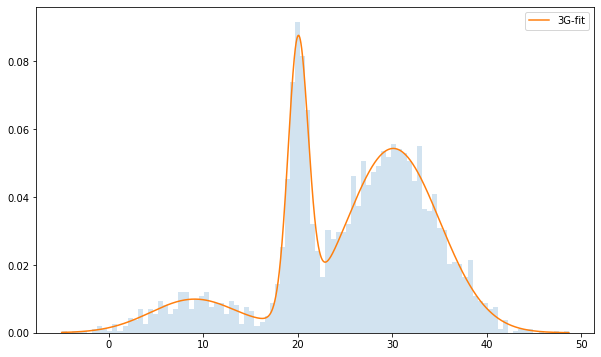

In [9]:
plt.figure(figsize=(10, 6))

plt.hist(data, bins=100, density=True, alpha=0.2)
plt.plot(x_i, mixed_gaussians(x_i, mus, sigmas, wts), label='3G-fit')

plt.legend(loc='upper right')
plt.show()

I now produce a plot where I show how the points are labeled (belong to one or the other gaussian distribution): I use the $\texttt{fit_predict()}$ function.

In [10]:
ggm = GaussianMixture(n_components=3, random_state=0).fit_predict(data)

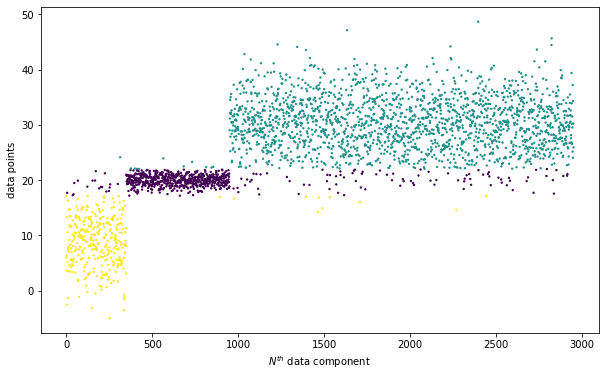

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(0, len(data)), data, c = ggm, s=1.8)  # c = ggm allows me to identify the three distributions' points by color
plt.xlabel("$N^{th}$ data component")
plt.ylabel("data points");

## 2) N = [1, .. 10] Gaussians fit: 

I now write a for loop to change the N value and produce fits: 

In [12]:
mixed_gauss_N = {}
aics = []

for n in range(1, 11): 
    
    gm_n = GaussianMixture(n_components=n, random_state=0).fit(data)
    
    wts_n, mus_n, sigmas_n = gm_n.weights_.flatten(), gm_n.means_.flatten(), np.sqrt(gm_n.covariances_.flatten())

    mixed_gauss_N[f"{n}th-data"] = mixed_gaussians(x_i, mus_n, sigmas_n, wts_n)
    
    aics.append(gm_n.aic(data))

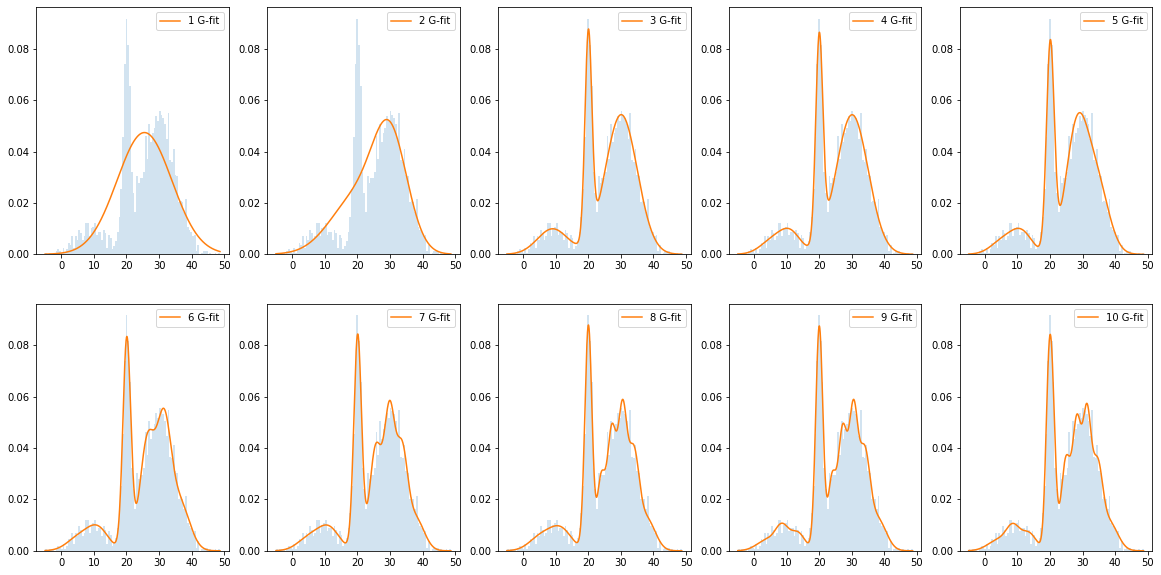

In [13]:
fig, axs = plt.subplots(2, 5, figsize=(20, 10))

axs[0, 0].hist(data, bins=100, density=True, alpha=0.2)
axs[0, 0].plot(x_i, mixed_gauss_N[f"1th-data"], label='1 G-fit')
axs[0, 0].legend()

axs[0, 1].hist(data, bins=100, density=True, alpha=0.2)
axs[0, 1].plot(x_i, mixed_gauss_N[f"2th-data"], label='2 G-fit')
axs[0, 1].legend()

axs[0, 2].hist(data, bins=100, density=True, alpha=0.2)
axs[0, 2].plot(x_i, mixed_gauss_N[f"3th-data"], label='3 G-fit')
axs[0, 2].legend()

axs[0, 3].hist(data, bins=100, density=True, alpha=0.2)
axs[0, 3].plot(x_i, mixed_gauss_N[f"4th-data"], label='4 G-fit')
axs[0, 3].legend()

axs[0, 4].hist(data, bins=100, density=True, alpha=0.2)
axs[0, 4].plot(x_i, mixed_gauss_N[f"5th-data"], label='5 G-fit')
axs[0, 4].legend()

axs[1, 0].hist(data, bins=100, density=True, alpha=0.2)
axs[1, 0].plot(x_i, mixed_gauss_N[f"6th-data"], label='6 G-fit')
axs[1, 0].legend()

axs[1, 1].hist(data, bins=100, density=True, alpha=0.2)
axs[1, 1].plot(x_i, mixed_gauss_N[f"7th-data"], label='7 G-fit')
axs[1, 1].legend()

axs[1, 2].hist(data, bins=100, density=True, alpha=0.2)
axs[1, 2].plot(x_i, mixed_gauss_N[f"8th-data"], label='8 G-fit')
axs[1, 2].legend()

axs[1, 3].hist(data, bins=100, density=True, alpha=0.2)
axs[1, 3].plot(x_i, mixed_gauss_N[f"9th-data"], label='9 G-fit')
axs[1, 3].legend()

axs[1, 4].hist(data, bins=100, density=True, alpha=0.2)
axs[1, 4].plot(x_i, mixed_gauss_N[f"10th-data"], label='10 G-fit')
axs[1, 4].legend()

I now try to see if there is a preferred model, using the AICS: 

Text(0, 0.5, 'AICS results')

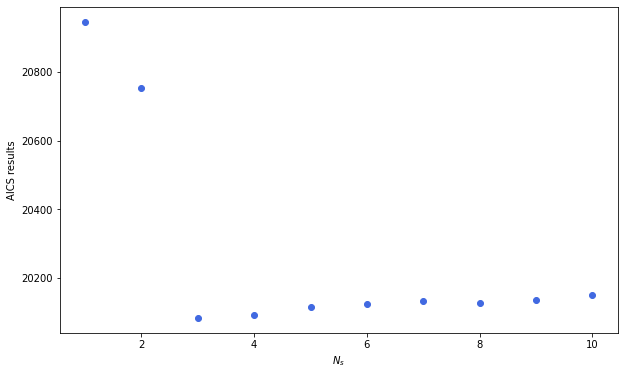

In [14]:
ns = np.array(range(1, 11))

plt.figure(figsize=(10, 6))
plt.scatter(ns, aics, marker='o', c= "royalblue")
plt.xlabel("$N_{s}$")
plt.ylabel("AICS results")

Find the minimum value:

In [15]:
print("Best model for n =", int(ns[aics == np.min(aics)]))

Best model for n = 3


My hypothesis was correct!